X-ray spectroscopies
=================

General aspects.

Figures:
- spectroscopies
- IP of elements?

Compare and contrast to UV/vis

In X-ray absorption spectroscopy the photon energy is tuned such that core electrons are targeted and excited to either bound or continuum states, and X-ray emission spectroscopy measures the subsequent decay from such an excited state. These core excitations/de-excitations exhibit strong relaxation effects, making theoretical considerations of the processes particularly challenging. While the removal of a valence electron leaves the remaining electrons relatively unaffected, removing core electrons has a substantial effect on the other electrons due to the significant change in the screening of the nucleus.

### Maybe first focus on ADC, and then move to TDDFT... Hm.

X-ray photoemission spectroscopy
--------------------------------------------------

ESCA molecule

In [30]:
from pyscf import gto, scf
import copy
import numpy as np
import matplotlib.pyplot as plt
molecule = 'O       0.0000000000     0.0000000000     0.1178336003;\
            H      -0.7595754146    -0.0000000000    -0.4713344012;\
            H       0.7595754146     0.0000000000    -0.4713344012'
mol = gto.Mole()
mol.atom  = molecule; mol.basis = '6-31G'
mol.build(); scfres = scf.UHF(mol); scfres.kernel(); print()

converged SCF energy = -75.9838703827192  <S^2> = 6.3380412e-12  2S+1 = 1



In [22]:
mo0 = copy.deepcopy(scfres.mo_coeff); occ0 = copy.deepcopy(scfres.mo_occ)
occ0[0][0] = 0.0  # beta core hole
scfion = scf.UHF(mol); scfion.conv_tol = 1e-12; scfion.conv_tol_grad = 1e-9
scf.addons.mom_occ(scfion, mo0, occ0)
scfion.kernel(); print()

converged SCF energy = -56.0754789470865  <S^2> = 0.76257807  2S+1 = 2.0125388



In [44]:
print('Ionization potential:',np.around(27.2114*(scfion.energy_tot() - scfres.energy_tot()),3),'eV')

Ionization potential: 541.735 eV


converged SCF energy = -412.27920254005  <S^2> = 2.7561033e-08  2S+1 = 1.0000001
SCF not converged.
SCF energy = -401.292344334552 after 50 cycles  <S^2> = 0.87006777  2S+1 = 2.1166651
converged SCF energy = -401.341585452585  <S^2> = 0.80717734  2S+1 = 2.0563826
SCF not converged.
SCF energy = -401.418242514604 after 50 cycles  <S^2> = 1.2389495  2S+1 = 2.4404504
converged SCF energy = -401.511489489204  <S^2> = 0.79315028  2S+1 = 2.0426946


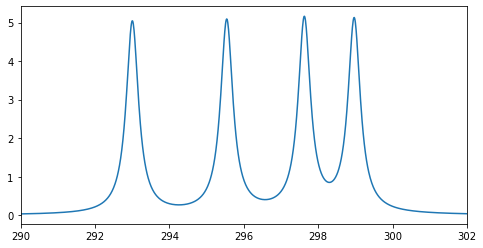

In [57]:
uracil   = ' C     0.000000     0.313341     1.284889;\
             C     0.000000    -1.129946     1.193271;\
             C     0.000000    -1.722413    -0.011510;\
             N     0.000000    -1.002386    -1.171240;\
             C     0.000000     0.377102    -1.212137;\
             N     0.000000     0.946281     0.038980;\
             O     0.000000     0.966706     2.309430;\
             O     0.000000     1.007669    -2.246643;\
             H     0.000000    -2.791379    -0.129000;\
             H     0.000000     1.954858     0.054525;\
             H     0.000000    -1.456186    -2.067038;\
             H     0.000000    -1.702677     2.098114'
mol_ura = gto.Mole()
mol_ura.atom  = uracil; mol_ura.basis = '6-31G'
mol_ura.build(); scf_ura = scf.UHF(mol_ura); scf_ura.kernel()
ionization_energies = []
for i in [4,5,6,7]:
    mo0 = copy.deepcopy(scf_ura.mo_coeff); occ0 = copy.deepcopy(scf_ura.mo_occ); occ0[0][i] = 0.0
    ion_tmp = scf.UHF(mol_ura); scf.addons.mom_occ(ion_tmp, mo0, occ0); ion_tmp.kernel()
    ionization_energies.append(27.2114*(ion_tmp.energy_tot() - scf_ura.energy_tot()))

def lorentzian(x, y, xmin, xmax, xstep, gamma):
    xi = np.arange(xmin,xmax,xstep); yi=np.zeros(len(xi))
    for i in range(len(xi)):
        for k in range(len(x)): yi[i] = yi[i] + y[k] * (gamma/2.) / ( (xi[i]-x[k])**2 + (gamma/2.)**2 )
    return xi,yi

plt.figure(figsize=(8,4))
xi,yi = lorentzian(ionization_energies,np.ones((len(ionization_energies))),290,302,0.01,0.4)
plt.plot(xi,yi); plt.xlim((290,302)); plt.show()

X-ray absorption spectroscopy
--------------------------------------------

XAS: focus on NEXAFS (prototypical spectrum, maybe)

Additionally, the core-excited states are embedded in a manifold of valence-excited states that needs to be considered by some computationally feasible method.


In [5]:
import gator
struct = gator.get_molecule("""
O       0.0000000000     0.0000000000     0.1187290000
H      -0.7532010000    -0.0000000000    -0.4749160000
H       0.7532010000     0.0000000000    -0.4749160000
""")
basis  = gator.get_molecular_basis(struct,'6-31G')
scfres = gator.run_scf(struct,basis)
adcres = gator.run_adc(struct,basis,scfres,method='cvs-adc2x',singlets=4,core_orbitals=1)

                                                                                                                          
                                        Algebraic Diagrammatic Construction (ADC)                                         
                                                                                                                          
                               ADC method                   : cvs-adc2x                                                   
                               Number of Singlet States     : 4                                                           
                               CVS-ADC, Core Orbital Space  : 1                                                           
                               Convergence threshold        : 1.0e-06                                                     
                                                                                                                          
Starting cvs-adc

Global spectrum?

### XAS: In continuum

CVS and CPP.

- illustration: water spectrum for 0-1000 eV


### Relaxation effects

Inclusion through electron correlation, Maybe Z+1. Maybe $\Delta$SCF.

- Illustration: ADC(n) hierarchy (1, 2, 2x, 3 for water)


1. Polarization dependence - illustrate

2. Atom assignment - illustrate

3. Visualization and descriptors - illustrate/tabulate

4. CVS versus CPP? Example


Maybe: moving to heavier elements: splitting of 2p lines and quadrupole-allowed transitions

Relativistic effects

Maybe RIXS

Consider ethylene, vinylfluoride, difluoroethylene, and trifluoroethylene:




X-ray emission spectroscopy
--------------------------------------------

- maybe illustration: Augen/fluorescent yield

Discuss difference XAS/XES

### XES: delta or overlap model

MOM etc

Resonant inelastic X-ray scattering
--------------------------------------------------


TDDFT
----------

### Self-interaction error

While there is no principal differences in considering either the valence or core densities in DFT, the use of approximate functionals introduce an error that is more important to account for when core electrons are addressed: the self-interaction error (SIE). This error is a result of spurious self-interactions for all electrons, but the larger density of the core orbitals makes it more influential for such a considerations — localized densities have larger self-repulsion than delocalized densities. For a single-electron systems the following equality should hold for the two-electron terms:

\begin{equation}
J[\rho] + E_{xc} [\rho] = 0.0
\end{equation}

This cancellation is achieved for, e.g. Hartree–Fock theory, but for any approximate functionals in DFT it will instead result in an erronous contribution to the energy. As the erronous self-interaction occurs in terms of self-repulsion, this will lead to an increase in the energy of the orbital in question (i.e. the absolute value will decrease). The simplest correction to this error was proposed by Perdew and Zunger, by correcting the total exchange-correlation energy by a term

\begin{equation}
XE PZ = E DFT -
(J[\rho_i] + E_{xc}[\rho_i]),
\end{equation}


summed over all singly occupied orbitals. This correction improves the potential energy surfaces, but gives minor improvements for orbital energies. Several schemes of correcting the SIE also exists for correcting orbital energies, 111–113 but none have been utilized in this thesis — we argue instead that the relative energies are most important and thus, in most cases, treat the SIE as a scalar element-dependent error to be accounted for. The SIE will be more thoroughly discussed in Section 5.2, but we here want to reiterate that the self-interaction depends strongly on the density of the orbital, and is thus most significant for core electrons of heavy elements.

DFT-based methods generally suffer from self-interaction error (SIE), which corresponds to the sum of Coulomb and exchange self-interactions that remain because of the use of approximate exchange functionals. In more detail, the Coulomb self-repulsion of each electron included in the Coulomb operator is exactly canceled by the nonlocal exchange self-attraction in Hartree--Fock theory, but this is no longer the case when the exchange operator is replaced by an approximate exchange functional. 128 For occupied orbitals, the SIE is defined as

Imamura and Nakai have determined the ground-state SIE of the C(1s) orbital of CO and shown that it amounts to 0.76, 1.30, and 0.40 eV at the BLYP, 141,142 B3LYP, 143,144 and BHHLYP 145 levels of theory, respectively. 146 The source origin of this SIE in the SCF approximation is the Coulomb operator with its sum over occupied orbitals, and, without a cancellation from the full exact Hartree--Fock exchange operator, it will lead to the SIE given in eq 36. Virtual orbitals will consequently not see an SIE in accordance with that for occupied orbitals. Instead, Imamura and Nakai defined an SIE for virtual orbitals in the context of electronic transitions and which depends on the occupied core orbital from which an excitation takes place.

- Spectrum as function of exact exchange

- maybe table with RPA/TDA

- maybe something with B3LYP versus CAM or something? (Functional dependence)

Exercises
--------------

1. Compute the X-ray absorption spectrum of water using ADC(2) and B3LYP, with variations of Dunning basis sets. How does it look...

2. Compute the C K-edge X-ray absorption spectra of the ethylene molecule using CVS-ADC(0), CVS-ADC(1), and CVS-ADC(2) in combination with the def2-SVP basis set. Choose an appropriate core space. What are the differences between the spectra computed at the different CVS-ADC levels? Are the differences between levels of theory larger in the case of core excitations or valence excitations? 

3. Compute the C K-edge XAS of vinylfluoride at the CVS-ADC(2) level of theory and using the def2-SVP basis set. Choose an appropriate core space and an appropriate number of excitation vectors. How does your result compare to the calculated spectrum from Ref. \cite{fransson2013}? 

4. Plot your CVS-ADC(2) spectrum in comparison to the experimental spectrum from Ref. \cite{fransson2013} (provided in the file {vinylfluoride.dat}). Identify the contribution of each of the two chemically inequivalent carbon atoms to the experimental peaks.

5. Compute also the C K-edge XAS spectra of difluoroethylene, and trifluoroethylene at the CVS-ADC(2) level of theory. Compare the spectra of ethylene, vinylfluoride, difluoroethylene, and trifluoroethylene to each other. What are the effects of fluorine substitution on the C K-edge spectrum? How large are the chemical shifts?
